In [1]:
import pandas as pd
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
from urllib import parse
from collections import Counter
warnings.filterwarnings("ignore")
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

In [ ]:
#10월 10일 ~ 10월 11일

In [2]:
wordCnt = pd.read_csv('fianl1011.csv') 

In [3]:
wordCnt

,url,검색어
0,h-lecture/,수능개념 확통
1,h-vod/,수능개념 확통
2,cmp/main-relate/,영어 모의고사
3,h-lecture/,미래엔 김성진
4,h-vod/,미래엔 김성진
...,...,...
242853,h-community/,화법과작문
242854,mat-mov/,6회 펜토미노가 심쿵해
242855,cmp/ark-mid/,마이그래
242856,mat-mov/,6회 돌도끼 수학 [1-3] 나눗셈(2)


In [4]:
#붙어있는 데이터 삭제 (붙어 있는 데이터는 검색1회로 처리하기 위해)

words = [wordCnt["검색어"][0]]

for i in range(1,len(wordCnt)):
    if words[-1] == wordCnt["검색어"][i]:
        continue
    else:
        words.append(wordCnt["검색어"][i])

In [5]:
#10월 09일 ~ 10월 10일 검색 빈도수 순위

cnt = Counter(words)
result = dict(cnt)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(100): #100위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('과학', 874)
2 위:  ('수능특강', 833)
3 위:  ('수학', 754)
4 위:  ('한국사', 715)
5 위:  ('영어', 642)
6 위:  ('뉴런', 603)
7 위:  ('정승제', 588)
8 위:  ('ㅇ', 576)
9 위:  ('ㄱ', 490)
10 위:  ('중', 487)
11 위:  ('ㅈ', 481)
12 위:  ('국어', 469)
13 위:  ('ㅅ', 446)
14 위:  ('모의고사', 434)
15 위:  ('수능완성', 431)
16 위:  ('4회 수건빙고', 426)
17 위:  ('6회 철인 삼종 그래프', 412)
18 위:  ('세계사', 395)
19 위:  ('추천검색어', 391)
20 위:  ('주', 389)
21 위:  ('역사', 363)
22 위:  ('올림포스', 319)
23 위:  ('여', 309)
24 위:  ('뉴', 306)
25 위:  ('생명과학', 298)
26 위:  ('만점왕', 295)
27 위:  ('최태성', 288)
28 위:  ('정승익', 287)
29 위:  ('주혜연', 282)
30 위:  ('왕초보영어', 280)
31 위:  ('통합과학', 279)
32 위:  ('화학', 274)
33 위:  ('ㄴ', 273)
34 위:  ('독서', 272)
35 위:  ('고', 270)
36 위:  ('사회', 269)
37 위:  ('중학', 264)
38 위:  ('통합사회', 260)
39 위:  ('영어듣기', 255)
40 위:  ('뉴러', 248)
41 위:  ('개념완성', 244)
42 위:  ('메시지를 확인하라', 241)
43 위:  ('14회 접시로 나눗셈', 240)
44 위:  ('1회 골라골라 곱셈왕', 236)
45 위:  ('수', 233)
46 위:  ('6회 펜토미노가 심쿵해', 226)
47 위:  ('과', 225)
48 위:  ('지구과학', 225)
49 위:  ('스마트폰 대신에 깨끗한 물!',

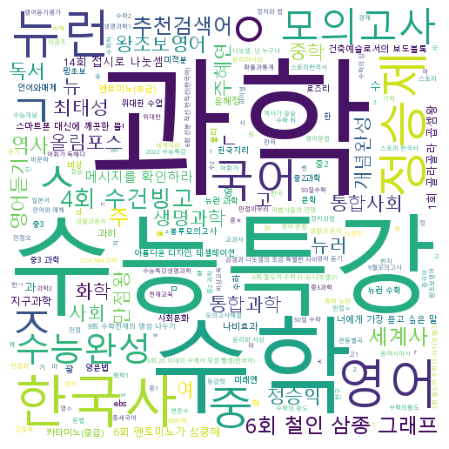

In [6]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white', width=500, height=500).generate_from_frequencies(result)

plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [7]:
#50위권내 오타나는 단어 찾아보기 (오타 : ㅇ, ㄱ, ㅈ, ㅅ, ㅁ, ㄴ )

typo = wordCnt.index[(wordCnt['검색어'] == 'ㅇ') | 
                     (wordCnt['검색어'] == 'ㄱ') |
                     (wordCnt['검색어'] == 'ㅈ') |
                     (wordCnt['검색어'] == 'ㅅ') |
                     (wordCnt['검색어'] == 'ㄴ') |
                     (wordCnt['검색어'] == 'ㅎ')].tolist() #인덱스 뽑기

for i in range(len(typo)): #일반적으로 오타뒤에 원래 원하는 값(인덱스 +1)을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo[i] = typo[i]+1

In [8]:
typoKeyword = wordCnt.loc[typo]["검색어"]

typoKeyword = Counter(typoKeyword)
result = dict(typoKeyword)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(50): #50위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('주', 80)
2 위:  ('고', 55)
3 위:  ('여', 51)
4 위:  ('중', 49)
5 위:  ('뉴', 48)
6 위:  ('수', 43)
7 위:  ('하', 31)
8 위:  ('기', 25)
9 위:  ('ㅈ', 23)
10 위:  ('뉼', 20)
11 위:  ('스', 18)
12 위:  ('ㅇㆍ', 18)
13 위:  ('ㅇ', 17)
14 위:  ('저', 17)
15 위:  ('과', 16)
16 위:  ('영어', 16)
17 위:  ('구', 15)
18 위:  ('즈', 15)
19 위:  ('ㅅ', 15)
20 위:  ('뉴러', 14)
21 위:  ('ㅎ', 14)
22 위:  ('어', 14)
23 위:  ('과학', 13)
24 위:  ('ㅁ', 13)
25 위:  ('ㄱ', 13)
26 위:  ('뉴런', 12)
27 위:  ('히', 12)
28 위:  ('사', 12)
29 위:  ('국어', 12)
30 위:  ('시', 12)
31 위:  ('수능완성', 12)
32 위:  ('ㄱㆍ', 12)
33 위:  ('한', 11)
34 위:  ('수능특강', 10)
35 위:  ('이', 10)
36 위:  ('추천검색어', 10)
37 위:  ('ㄴ', 9)
38 위:  ('그', 8)
39 위:  ('ㅇᆢ', 8)
40 위:  ('사회', 8)
41 위:  ('정', 8)
42 위:  ('한국사', 8)
43 위:  ('국', 8)
44 위:  ('영', 8)
45 위:  ('중2', 7)
46 위:  ('호', 7)
47 위:  ('소', 7)
48 위:  ('ㅊ', 7)
49 위:  ('모의고사', 7)
50 위:  ('역', 7)


In [9]:
#50위권내 오타나는 단어 찾아보기 (오타 : ㅇ, ㄱ, ㅈ, ㅅ, ㅁ, ㄴ )

typo = wordCnt.index[(wordCnt['검색어'] == 'ㅇ') | 
                     (wordCnt['검색어'] == 'ㄱ') |
                     (wordCnt['검색어'] == 'ㅈ') |
                     (wordCnt['검색어'] == 'ㅅ') |
                     (wordCnt['검색어'] == 'ㅁ') |
                     (wordCnt['검색어'] == 'ㄴ')].tolist() #인덱스 뽑기

for i in range(len(typo)): #일반적으로 오타뒤(인덱스 +2)에 원래 원하는 값을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo[i] = typo[i]+2

In [10]:
typoKeyword = wordCnt.loc[typo]["검색어"]

typoKeyword = Counter(typoKeyword)
result = dict(typoKeyword)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(50): #50위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('중', 54)
2 위:  ('여', 36)
3 위:  ('주', 31)
4 위:  ('고', 25)
5 위:  ('뉴', 25)
6 위:  ('과', 22)
7 위:  ('과학', 21)
8 위:  ('영', 21)
9 위:  ('수', 21)
10 위:  ('뉼', 21)
11 위:  ('ㄱ', 18)
12 위:  ('뉴런', 18)
13 위:  ('영어', 16)
14 위:  ('수학', 15)
15 위:  ('기', 15)
16 위:  ('마', 15)
17 위:  ('ㅈ', 14)
18 위:  ('ㅇ', 14)
19 위:  ('ㅅ', 13)
20 위:  ('뉴러', 12)
21 위:  ('숳', 12)
22 위:  ('국어', 10)
23 위:  ('역사', 10)
24 위:  ('만', 10)
25 위:  ('정승제', 10)
26 위:  ('미', 10)
27 위:  ('영어듣기', 9)
28 위:  ('즈', 9)
29 위:  ('국', 9)
30 위:  ('괗', 9)
31 위:  ('수하', 8)
32 위:  ('과하', 8)
33 위:  ('수능완성', 8)
34 위:  ('한국사', 8)
35 위:  ('개념완성', 8)
36 위:  ('중2', 7)
37 위:  ('수학의 답', 7)
38 위:  ('사', 7)
39 위:  ('중ㅎ', 7)
40 위:  ('ㅎ', 7)
41 위:  ('모의고사', 7)
42 위:  ('ㄴ', 7)
43 위:  ('역', 7)
44 위:  ('사회', 7)
45 위:  ('중학', 7)
46 위:  ('영ㅇ', 6)
47 위:  ('14회 접시로 나눗셈', 6)
48 위:  ('위대한 수업', 6)
49 위:  ('이', 6)
50 위:  ('ㅇㆍ', 6)


In [11]:
#"ㅈ만 확인"

typo = wordCnt.index[wordCnt['검색어'] == 'ㅇ'].tolist() #인덱스 뽑기
typo1 = []
typo2 = []
for i in range(len(typo)): #일반적으로 오타뒤에 원래 원하는 값(인덱스 +1)을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo1.append(typo[i]+1)
    typo2.append(typo[i]+2)
    
typoKeyword = wordCnt.loc[typo]
typo1 = wordCnt.loc[typo1]["검색어"]
typo2 = wordCnt.loc[typo2]["검색어"]

typoKeyword = typoKeyword.reset_index(drop = True)
typo1 = typo1.reset_index(drop = True)
typo2 = typo2.reset_index(drop = True)

typoKeyword["+1"] = typo1
typoKeyword["+2"] = typo2

typoKeyword = typoKeyword[["검색어","+1","+2"]]
typoKeyword[:30]

,검색어,+1,+2
0,ㅇ,여,영ㅇ
1,ㅇ,오스,어후
2,ㅇ,2022수능특강수학II,2022수능특강수학II
3,ㅇ,EBS 중학 뉴런 과학1,TCH_NM:EBS 중학 뉴런 과학1
4,ㅇ,ㅇᆢ,연
5,ㅇ,ㅇᆢ,영
6,ㅇ,ㅇㆍ,ㅇᆢ
7,ㅇ,ㅇㆍ,ㅇᆢ
8,ㅇ,위,윋
9,ㅇ,올ㄹ,올림
